# Лабораторная работа 3 + Бонус
## Предсказание цены на подержанные автомобили Ford

## Выполнил: __Щеткин Дмитрий Сергеевич__

группа 2.1

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%%capture
!wget https://github.com/nzhukov/14-09-2020-example/raw/refs/heads/master/training_data.xlsx
!wget https://github.com/nzhukov/14-09-2020-example/raw/refs/heads/master/test_data.xlsx

In [4]:
training_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [5]:
training_data = training_data.dropna()
training_data = training_data._get_numeric_data()
training_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,45.518031,-122.578752,50.0


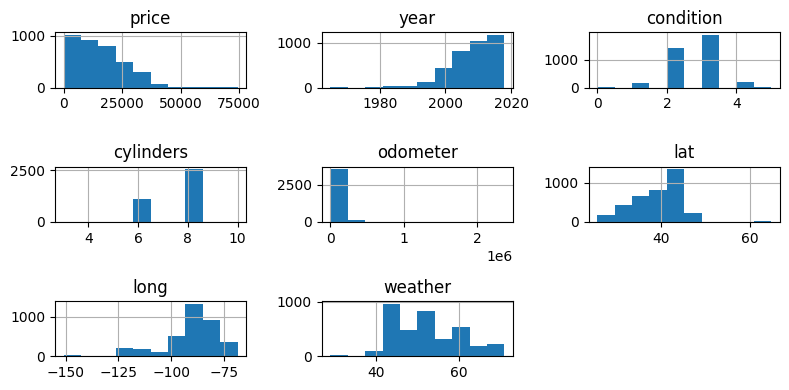

In [6]:
training_data.hist(figsize=(8, 4))
plt.tight_layout()
plt.show()

In [7]:
target_variable_name = 'price'
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)
training_points.head()

,year,condition,cylinders,odometer,lat,long,weather
0,2016,4,6,43500,36.471500,-82.483400,59.0
1,2009,2,8,98131,40.468826,-74.281734,52.0
2,2002,2,8,201803,42.477134,-82.949564,45.0
3,2000,1,8,170305,40.764373,-82.349503,49.0
5,2003,3,8,167662,45.518031,-122.578752,50.0


In [8]:
from sklearn import linear_model, ensemble

In [9]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model

LinearRegression()

In [10]:
random_forest_model = ensemble.RandomForestRegressor(random_state=42)
random_forest_model

RandomForestRegressor(random_state=42)

In [11]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [12]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(random_state=42)

In [13]:
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
3,24988,2012,4,6,85572,clean,automatic,4wd,NaN,30.457703,-84.347448,65.0
4,20995,2014,3,6,157556,clean,automatic,NaN,full-size,42.701772,-89.008858,45.0


In [14]:
test_data.shape

(2104, 12)

In [15]:
test_data = test_data.dropna()
test_data = test_data._get_numeric_data()
test_data.shape

(1543, 8)

In [16]:
test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)
test_points.shape

(1543, 7)

In [17]:
list(test_points)==list(training_points)

True

In [18]:
test_predictions_linear = linear_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)

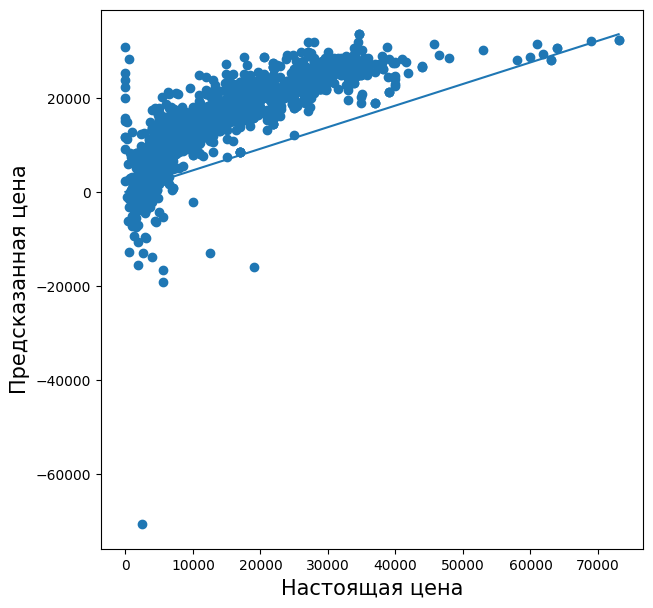

In [19]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=15)
plt.ylabel('Предсказанная цена', fontsize=15);

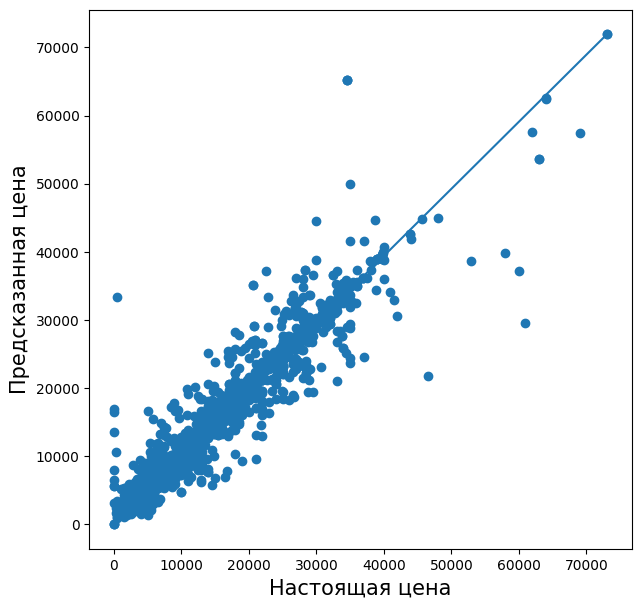

In [20]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=15)
plt.ylabel('Предсказанная цена', fontsize=15);

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
print(mean_absolute_error(test_values, test_predictions_linear))
print(mean_squared_error(test_values, test_predictions_linear))

4485.5561321652995
44306847.723116346


In [23]:
print(mean_absolute_error(test_values, test_predictions_random_forest))
print(mean_squared_error(test_values, test_predictions_random_forest))

1828.1467979630402
12557936.569313794


Теперь напечатаем полученные ошибки.

In [24]:
r2_score_linear_model = r2_score(test_values, test_predictions_linear)
r2_score_random_forest_model = r2_score(test_values, test_predictions_random_forest)

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        mean_absolute_error(test_values, test_predictions_linear),
        mean_squared_error(test_values, test_predictions_linear)**0.5, r2_score_linear_model))

print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest),
       mean_squared_error(test_values, test_predictions_random_forest)**0.5, r2_score_random_forest_model))

MAE: 4485.56, RMSE: 6656.34, R2:    0.62 for linear model
MAE: 1828.15, RMSE: 3543.72,  R2:    0.89 for random forest model


Модель случайного леса показала лучшие результаты по всем метрикам: MAE снизился с 4485.56 до 1828.15, RMSE уменьшился с 6656.34 до 3543.72, а коэффициент детерминации R² увеличился с 0.62 до 0.89. Это доказывает то, что модель случайного леса справляется с задачей предсказания точнее и надежнее, чем линейная регресия.

# Обзор результатов

В этом ноутбуке мы научились
1. Определять наличие пропусков в данных
2. Избавляться от пропусков в данных
3. Строить гистограммы для возможных значений признаков

## Бонус: Добавление в данные категориальных признаков


In [25]:
training_data = pd.read_excel('training_data.xlsx')
training_data = training_data.drop('Unnamed: 0', axis = 1)
training_data = training_data.dropna()

test_data = pd.read_excel('test_data.xlsx')
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.dropna()

In [26]:
training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
text_categor_cols = ['title_status', 'transmission', 'drive', 'size']

for col in text_categor_cols:
    training_data[col] = le.fit_transform(training_data[col]) + 1
    pass

training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,1,1,1,2,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,1,1,1,2,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,1,1,1,2,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,4,1,1,2,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,1,1,1,2,45.518031,-122.578752,50.0


In [29]:
text_categor_cols = ['title_status', 'transmission', 'drive', 'size']

for col in text_categor_cols:
    test_data[col] = le.fit_transform(test_data[col]) + 1
    pass

test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,1,1,1,2,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,1,1,1,2,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,1,1,1,2,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,1,1,1,2,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,1,1,3,2,32.832296,-97.169012,67.0


In [30]:
target_variable_name = 'price'
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)
test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)

random_forest_model = ensemble.RandomForestRegressor(random_state=42)
random_forest_model.fit(training_points, training_values)

test_predictions_random_forest_le = random_forest_model.predict(test_points)
print(test_predictions_random_forest_le)

[ 6284.8        20054.39       21270.74466667 ...  6942.04
 10901.         16919.78666667]


In [31]:
print('With using encoded text features')
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest_le),
       mean_squared_error(test_values, test_predictions_random_forest_le)**0.5))

With using encoded text features
MAE: 1664.12, RMSE: 3329.96 for random forest model


In [32]:
print('Using only numeric features')
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest),
       mean_squared_error(test_values, test_predictions_random_forest)**0.5))

Using only numeric features
MAE: 1828.15, RMSE: 3543.72 for random forest model


Как видно, добавление текстовых закодированных признаков улучшило работу модели, так как значения метрик меньше.

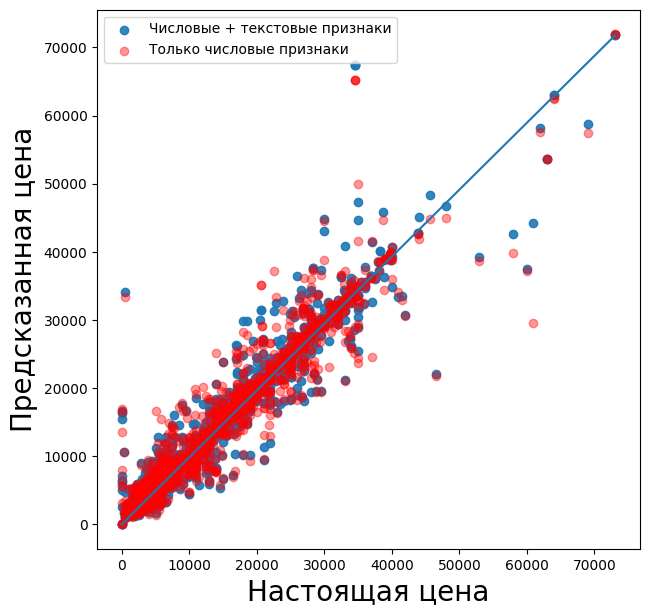

In [33]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest_le, alpha=0.9, label='Числовые + текстовые признаки');
plt.scatter(test_values, test_predictions_random_forest, color='red', alpha=0.4, label='Только числовые признаки');
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest_le)]);

plt.legend()
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Из графика видно, что мы стали лучше предсказывать стоимость автомобилей с высокой настоящей ценой.